In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
test_df = pd.read_csv("~/real_estate/data/v8/test_df.csv")
train_df = pd.read_csv("~/real_estate/data/v8/train_df.csv")
train_df_adasyn = pd.read_csv("~/real_estate/data/v8/train_df_adasyn.csv")
train_df_smote = pd.read_csv("~/real_estate/data/v8/train_df_smote_ratio.csv")

features = train_df.columns[:-2]

X_test = test_df[features].values
X_train = train_df[features].values
X_train_adasyn = train_df_adasyn[features].values
X_train_smote = train_df_smote[features].values

y_test = test_df["target"].values
y_train = train_df["target"].values
y_train_adasyn = train_df_adasyn["target"].values
y_train_smote = train_df_smote["target"].values

### Train Linear Regressions

In [3]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_hat_1 = model_1.predict(X_test)
y_train_hat_1 = model_1.predict(X_train)
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat_1)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_1)[0,1]))

R^2 train:  0.34427373981534026
R^2 test:  0.25776268630080273


In [5]:
model_2 = LinearRegression()
model_2.fit(X_train_adasyn, y_train_adasyn)
y_test_hat_2 = model_2.predict(X_test)
y_train_hat_2 = model_2.predict(X_train_adasyn)
print("R^2 train: ", np.square(np.corrcoef(y_train_adasyn, y_train_hat_2)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_2)[0,1]))

R^2 train:  0.7437493450541329
R^2 test:  0.2035723935409155


In [6]:
model_3 = LinearRegression()
model_3.fit(X_train_smote, y_train_smote)
y_test_hat_3 = model_3.predict(X_test)
y_train_hat_3 = model_3.predict(X_train_smote)
print("R^2 train: ", np.square(np.corrcoef(y_train_smote, y_train_hat_3)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_3)[0,1]))

R^2 train:  0.6791396549456025
R^2 test:  0.21178962714974853


### Plot Results

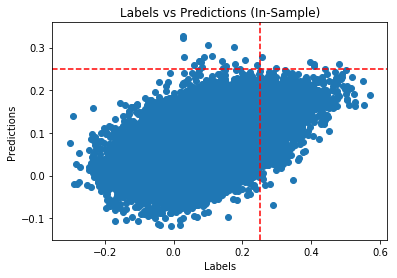

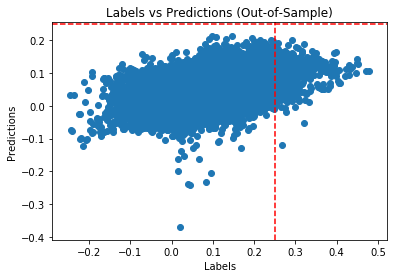

In [7]:
plt.scatter(y_train, y_train_hat_1)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat_1)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

### Get Coefficients

In [10]:
model = sm.OLS(y_train, X_train)
model = model.fit()

coefficients = model.params
standard_errors = model.HC0_se

regression_table = pd.DataFrame({"coefficients":coefficients, 
                                 "standard_errors":standard_errors,
                                 "t-statistics":coefficients/standard_errors}, index=features)

In [11]:
regression_table

,coefficients,standard_errors,t-statistics
year,-0.837455,0.040849,-20.501371
month,-0.258624,0.012369,-20.908981
90_day_treasury_bill_rate,0.005540,0.002051,2.701746
mean_adjusted_income_lag_log,0.153312,0.010259,14.943475
mean_adjusted_income_with_dep_lag_log,-0.194250,0.009894,-19.633987
mean_fixed_mortgage_rate,-0.000114,0.002099,-0.054367
mean_hourly_earnings_adj,0.129199,0.033878,3.813691
mean_mortgage_interest_hh_lag_log,0.010373,0.002780,3.731480
mean_real_estate_taxes_hh_lag_log,-0.010338,0.002528,-4.088489
median_sqft_value_log,0.112400,0.005520,20.362387
